In [3]:
import pandas as pd
import numpy as np
customers=pd.read_csv(r"p1-customers.csv")
mailing_list=pd.read_csv(r"p1-mailinglist.csv")
customers.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer
0,Pamela Wright,Store Mailing List,2,376 S Jasmine St,Denver,CO,80224,227.90,100,No,1,6
1,Danell Valdez,Store Mailing List,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,Yes,1,6
2,Jessica Rinehart,Store Mailing List,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,No,1,3
3,Nancy Clark,Store Mailing List,9,4497 Cornish Way,Denver,CO,80239,195.31,105,Yes,1,6
4,Andrea Brun,Store Mailing List,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,Yes,1,2


In [4]:
mailing_list.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Score_No,Score_Yes
0,A Giametti,Loyalty Club Only,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036
1,Abby Pierson,Loyalty Club and Credit Card,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725
2,Adele Hallman,Loyalty Club Only,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882
3,Alejandra Baird,Loyalty Club Only,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138
4,Alice Dewitt,Loyalty Club Only,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name                        2375 non-null   object 
 1   Customer_Segment            2375 non-null   object 
 2   Customer_ID                 2375 non-null   int64  
 3   Address                     2375 non-null   object 
 4   City                        2375 non-null   object 
 5   State                       2375 non-null   object 
 6   ZIP                         2375 non-null   int64  
 7   Avg_Sale_Amount             2375 non-null   float64
 8   Store_Number                2375 non-null   int64  
 9   Responded_to_Last_Catalog   2375 non-null   object 
 10  Avg_Num_Products_Purchased  2375 non-null   int64  
 11  #_Years_as_Customer         2375 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 222.8+ KB


In [10]:
#Changing Store_Number in object type
customers['Store_Number']=customers['Store_Number'].astype(object)
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name                        2375 non-null   object 
 1   Customer_Segment            2375 non-null   object 
 2   Customer_ID                 2375 non-null   int64  
 3   Address                     2375 non-null   object 
 4   City                        2375 non-null   object 
 5   State                       2375 non-null   object 
 6   ZIP                         2375 non-null   int64  
 7   Avg_Sale_Amount             2375 non-null   float64
 8   Store_Number                2375 non-null   object 
 9   Responded_to_Last_Catalog   2375 non-null   object 
 10  Avg_Num_Products_Purchased  2375 non-null   int64  
 11  #_Years_as_Customer         2375 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 222.8+ KB


In [12]:
customers['Customer_Segment'].value_counts()

Store Mailing List              1108
Loyalty Club Only                579
Credit Card Only                 494
Loyalty Club and Credit Card     194
Name: Customer_Segment, dtype: int64

In [13]:
customers['City'].value_counts()

Denver               750
Aurora               493
Arvada               247
Lakewood             217
Broomfield           125
Westminster           85
Centennial            78
Littleton             72
Englewood             56
Wheat Ridge           54
Thornton              35
Parker                27
Northglenn            24
Highlands Ranch       23
Golden                19
Greenwood Village     14
Edgewater             12
Commerce City         10
Superior               9
Morrison               7
Lafayette              5
Louisville             4
Boulder                3
Castle Pines           2
Brighton               2
Lone Tree              1
Henderson              1
Name: City, dtype: int64

In [20]:
customers['Avg_Num_Products_Purchased'].value_counts()

1     858
2     289
3     277
4     240
5     235
6     216
7     164
8      36
11     10
10      9
12      8
16      7
9       7
17      5
15      3
21      2
22      2
19      2
14      1
18      1
20      1
13      1
26      1
Name: Avg_Num_Products_Purchased, dtype: int64

In [22]:
customers['#_Years_as_Customer'].value_counts()

2    316
8    313
6    307
1    297
5    294
3    285
4    284
7    279
Name: #_Years_as_Customer, dtype: int64

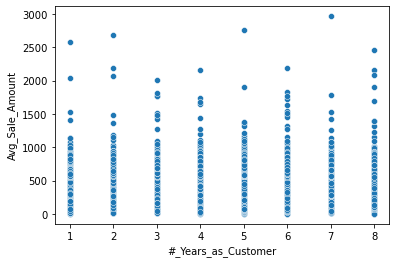

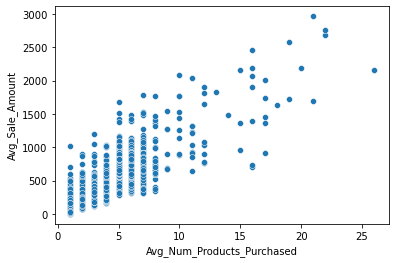

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
#As only two variables are continous. Hence we are plotting to see whether there is a linear relationship
#between the predictor and target variable or not
pvar=['#_Years_as_Customer','Avg_Num_Products_Purchased']
for i in pvar:
    sns.scatterplot(x=customers[i],y=customers['Avg_Sale_Amount'])
    plt.show()

As we can see above that we can possible fit a straight line when using the variable Avg_Num_Products_Purchased as a predictor variable.
Now we will convert categorical value into dummy value

In [28]:
dummy=pd.get_dummies(customers[['Customer_Segment','Store_Number']])
dummy.head()

,Customer_Segment_Credit Card Only,Customer_Segment_Loyalty Club Only,Customer_Segment_Loyalty Club and Credit Card,Customer_Segment_Store Mailing List,Store_Number_100,Store_Number_101,Store_Number_102,Store_Number_103,Store_Number_104,Store_Number_105,Store_Number_106,Store_Number_107,Store_Number_108,Store_Number_109
0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,1,0,0,0,0,0,0,0,0,0


In [39]:
#copying useful variables
dummy['Avg_Sale_Amount']=customers['Avg_Sale_Amount']
dummy['Avg_Num_Products_Purchased']=customers['Avg_Num_Products_Purchased']
dummy['#_Years_as_Customer']=customers['#_Years_as_Customer']
dummy.head()

,Customer_Segment_Credit Card Only,Customer_Segment_Loyalty Club Only,Customer_Segment_Loyalty Club and Credit Card,Customer_Segment_Store Mailing List,Store_Number_100,Store_Number_101,Store_Number_102,Store_Number_103,Store_Number_104,Store_Number_105,Store_Number_106,Store_Number_107,Store_Number_108,Store_Number_109,Avg_Sale_Amount,Avg_Num_Products_Purchased,#_Years_as_Customer
0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,227.90,1,6
1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,55.00,1,6
2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,212.57,1,3
3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,195.31,1,6
4,0,0,0,1,1,0,0,0,0,0,0,0,0,0,110.55,1,2


### Testing the variables for p-value & r-value

In [33]:
import scipy.stats

In [46]:
for i in dummy.columns:
    print("The summarry stats of ", i,"is ",scipy.stats.linregress(dummy['Avg_Sale_Amount'],dummy[i]),'\n')

The summarry stats of  Customer_Segment_Credit Card Only is  LinregressResult(slope=0.0005089006422779169, intercept=0.00455470749371803, rvalue=0.4263576980846726, pvalue=1.5975575652660194e-105, stderr=2.216383106292922e-05) 

The summarry stats of  Customer_Segment_Loyalty Club Only is  LinregressResult(slope=-7.255952217672283e-06, intercept=0.24669021539820857, rvalue=-0.005746467411130603, pvalue=0.77955187819432, stderr=2.592014496862307e-05) 

The summarry stats of  Customer_Segment_Loyalty Club and Credit Card is  LinregressResult(slope=0.00047640414797740565, intercept=-0.108769825457272, rvalue=0.5914878369245153, pvalue=3.7698750320948004e-224, stderr=1.333168379665473e-05) 

The summarry stats of  Customer_Segment_Store Mailing List is  LinregressResult(slope=-0.0009780488380376504, intercept=0.8575249025653455, rvalue=-0.6666552995071303, pvalue=3.336921018649553e-305, stderr=2.244812168386041e-05) 

The summarry stats of  Store_Number_100 is  LinregressResult(slope=1.511

*As we can see above that the r-value of #_Years_as_Customer is more than 0.05. So, we have to remove it from the predictor variables of linear regression equation.Rest of the values are fine.*

In [52]:
dummy=dummy.drop('#_Years_as_Customer',axis=1)

In [66]:
from sklearn.linear_model import LinearRegression

In [70]:
X=dummy.drop('Avg_Sale_Amount',axis=1)
y=dummy['Avg_Sale_Amount']
X.head()


,Customer_Segment_Credit Card Only,Customer_Segment_Loyalty Club Only,Customer_Segment_Loyalty Club and Credit Card,Customer_Segment_Store Mailing List,Store_Number_100,Store_Number_101,Store_Number_102,Store_Number_103,Store_Number_104,Store_Number_105,Store_Number_106,Store_Number_107,Store_Number_108,Store_Number_109,Avg_Num_Products_Purchased
0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1


In [68]:
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [72]:
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Intercept: 
 276.388742053684
Coefficients: 
 [  28.08639427 -121.52192903  311.00657014 -217.57103539    9.63922375
    5.12139185    3.61165499    5.51026475  -10.63328941  -10.47759433
   -7.11101338   -3.33763318   -1.79401363    9.4710086    66.88892902]


In [73]:
y_pred = model.predict(X)

In [75]:
# Prediction score
from sklearn.metrics import r2_score
print(r2_score(y,y_pred))

0.8373910200591534
